In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [16]:
# Constants
Q = 10    # source emission rate (kg/s)
U = 3     # wind speed (m/s)
H = 0
min_concentration = 9*10**(-7)
x0, y0, z0 = 500, 0, 0

# Grid
rmax = 4000  # size of domain in r (m)
ymax = 2000  # size of domain in y (m)
N = 2000     # number of plotting points

In [17]:
# Определение устойчивости атмосферы
def classify_atmospheric_stability(U: int):
    ''''''
    if U < 2:
        return "B"
    elif U < 5:
        return "C"
    else:
        return "D"

In [18]:
a1 = 0.112
a2 = 5.38**(-4)
b1 = 1.06

c1 = 7.37
c2 = 4.29*10**3
d1 = -0.0957
d2 = -0.6

c3, c4 = 0.33, 1.5
def calc_dy(x):
    return (c3*x)/((1+c4*10**(-4)*x)**(1/2))

def F(x):
    if z0 <= 0.1:
        return np.log(c1*(x**d1)*(1 + (c2*x**d2)**(-1)))
    else:
        return np.log(c1*(x**d1)*((1 + c2*x**d2)**(-1)))

def g(x):
    return (a1*x**b1)/(1+a2*x**d2)

vg = 0

def calc_dz(x):
    return (F(x)*g(x))/((1 + vg**2)**(1/2))

In [19]:
def gauss_func(x, y, z, atmospheric_stability):
    
    dy, dz = calc_dy(x), calc_dz(x)#calculate_plume_dispersion(x, atmospheric_stability)

    a = Q/(2*np.pi*U*dy*dz)
    b = np.exp((-(y-y0)**2)/(2*dy**2))
    c = np.exp((-(z-H)**2)/(2*dz**2))
    d = np.exp((-(z+H)**2)/(2*dz**2))
    return a*b*(c+d)

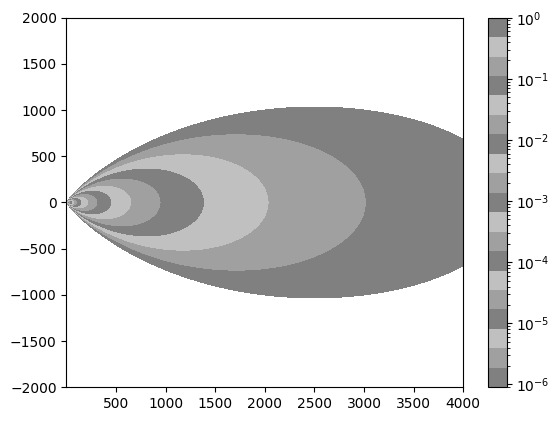

9.036614285457137e-07
0.0


In [20]:
lev = list(np.geomspace(min_concentration, 1, 20))
atmospheric_stability = classify_atmospheric_stability(U)

rr, yy = np.meshgrid(np.linspace(0.005, rmax, N), np.linspace(-ymax, ymax, 2*N))
cc = gauss_func(rr,yy, 1, atmospheric_stability)

cs = plt.contourf(rr, yy, cc, lev, colors=['#808080', '#A0A0A0', '#C0C0C0'])
plt.axis('off')
plt.savefig('test.jpg', dpi=300, bbox_inches='tight', facecolor="black")
plt.axis('on')
cbar = plt.colorbar()
cbar.ax.set_yscale('log')
plt.show()
print(cc[1000][1000])
print(cc[1000][0])


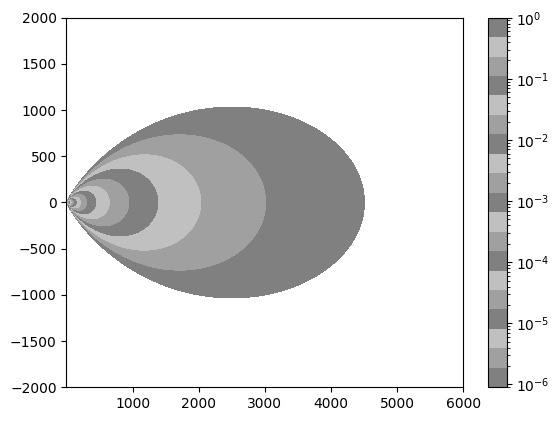

9.004923605829151e-07
0.0


In [21]:
rmax = 6000
lev = list(np.geomspace(min_concentration, 1, 20))

rr, yy = np.meshgrid(np.linspace(0.005, rmax, N), np.linspace(-ymax, ymax, 2*N))
cc = gauss_func(rr,yy, 1, atmospheric_stability)

cs = plt.contourf(rr, yy, cc, lev, colors=['#808080', '#A0A0A0', '#C0C0C0'])
plt.axis('off')
plt.savefig('test.jpg', dpi=300, bbox_inches='tight', facecolor="black")
plt.axis('on')
cbar = plt.colorbar()
cbar.ax.set_yscale('log')
plt.show()
print(cc[1000][1000])
print(cc[1000][0])
